In [6]:
# Import Libraries
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt



In [7]:
# Download Data
def download(url, filename):
    # Send a GET request to fetch the content of the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Write the content to a file with the specified filename
        with open(filename, "wb") as file:
            file.write(response.content)
        print(f"File downloaded successfully as {filename}")
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")


download("https://www.thp.uni-koeln.de/trebst/Lectures/CompPhys-2020/mnist_train.csv", "mnist_train.csv")

download("https://www.thp.uni-koeln.de/trebst/Lectures/CompPhys-2020/mnist_test.csv", "mnist_test.csv")

test = pd.read_csv("mnist_test.csv", header=None)
test = test.to_numpy()
train = pd.read_csv("mnist_train.csv", header=None)
train = train.to_numpy()

File downloaded successfully as mnist_train.csv
File downloaded successfully as mnist_test.csv


In [8]:
# Check out data
n_test = len(test)
n_train = len(train)
print(f"Numbers of training data: {n_test}, number of test data {n_train}")
print(f"Shape of training data: {train.shape}")

Numbers of training data: 10000, number of test data 60000
Shape of training data: (60000, 785)


In [9]:
## Allocate Memory
X_train = np.zeros((n_train, 784))
X_test = np.zeros((n_test, 784))
y_train = np.zeros((n_train, 10))
y_test = np.zeros((n_test, 10))

In [10]:
# Set Values Of Training Data
X_train = train[:,1:]/ 255.0
X_test = test[:,1:]/ 255.0
for i in range(60000):
    y_train[i,train[i,0]] = 1
for j in range(10000):
    y_test[j,test[j,0]] = 1



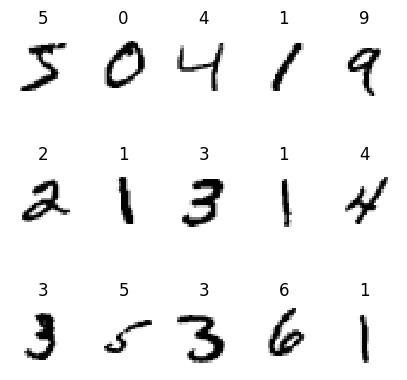

In [11]:
# Show data
images_and_labels=list(zip(X_train,train[:,0]))
plt.figure(figsize=(5,5))
for index,(image,label) in enumerate(images_and_labels[:15]):
    plt.subplot(3,5,index+1)
    plt.axis('off')
    plt.imshow(np.reshape(image,(28,28)),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('%i' % int(label))

In [12]:
# Activation function for neurons
def sigmoid(Z):
    Z = np.clip(Z, -500, 500)
    return 1/(1+np.exp(-Z))

# Derivative
def dsigmoid(Z):
    return sigmoid(Z)*(1-sigmoid(Z))

In [33]:
# Initialize Weighs and Bias
def initialize_parameters(n_input, n_hidden1, n_hidden2, n_output):
    W_input_hidden1 = (np.random.rand(n_input, n_hidden1) - 0.5) * 2
    W_hidden1_hidden2 = (np.random.rand(n_hidden1, n_hidden2) - 0.5) * 2
    W_hidden2_output = (np.random.rand(n_hidden2, n_output) - 0.5) * 2

    B_hidden1 = (np.random.rand(n_hidden1) - 0.5) * 2
    B_hidden2 = (np.random.rand(n_hidden2) - 0.5) * 2
    B_output = (np.random.rand(n_output) - 0.5) * 2

    return W_input_hidden1, W_hidden1_hidden2, W_hidden2_output, B_hidden1, B_hidden2, B_output


In [28]:
# Propagate Data forward through network
def forward_propagation(X, W_input_hidden1, W_hidden1_hidden2, W_hidden2_output, B_hidden1, B_hidden2, B_output):
    hidden1_layer_values = sigmoid(np.dot(X, W_input_hidden1) + B_hidden1)
    hidden2_layer_values = sigmoid(np.dot(hidden1_layer_values, W_hidden1_hidden2) + B_hidden2)
    output_layer_values = sigmoid(np.dot(hidden2_layer_values, W_hidden2_output ) + B_output)

    return hidden1_layer_values, hidden2_layer_values, output_layer_values


In [29]:
# Calc Error in output and first back step
def calc_errors(Y, output_layer_values):
    # Fehler im Output bestimmen und auf Hidden Layer ebene zurueckpropagieren
    result_err = Y- output_layer_values
    result_delta = result_err * dsigmoid(output_layer_values)

    return result_err, result_delta

In [39]:
# Calc error in hidden and second backprop
def backpropagation(W_hidden1_hidden2, W_hidden2_output, result_delta , hidden1_layer_values, hidden2_layer_values):
    # Fehler im Hidden-Layer bestimmen
    hidden2_err = np.dot(W_hidden2_output, result_delta)
    hidden2_delta = hidden2_err * dsigmoid(hidden2_layer_values)

    hidden1_err = np.dot(W_hidden1_hidden2, hidden2_delta)
    hidden1_delta = hidden1_err * dsigmoid(hidden1_layer_values)

    return hidden1_err, hidden1_delta, hidden2_err, hidden2_delta

In [40]:
# initialize parameters for deep neural networks
n_input = 28 * 28 # fixed by input
n_hidden1 = 256 # set by user
n_hidden2 = 256 # set by user
n_output = 10 # fixed by output
iterations = 100 # Training iterations
learning_rate = 0.005 # Learning rate (Step of gradient descent)

# Using mini batches to speed up the process
USE_MINI_BATCHES = True # Set to false if not needed

if USE_MINI_BATCHES:
    iterations = 500
    batch_size = 128
    batches = 32
else:
    batch_size = len(X_train)

def train_model(X_train, y_train, iterations, learning_rate):

    # initialize
    W_input_hidden1, W_hidden1_hidden2, W_hidden2_output, B_hidden1, B_hidden2, B_output = initialize_parameters(n_input, n_hidden1, n_hidden2, n_output)

    for iter in range(iterations):
        # calc errors



        order_list = np.arange(len(X_train))
        if USE_MINI_BATCHES:
            batches = 20
            np.random.shuffle(order_list)
        else:
            batches = 1

        for b in range(batches):
            dW_input_hidden1 = np.zeros(W_input_hidden1.shape)
            dW_hidden1_hidden2 = np.zeros(W_hidden1_hidden2.shape)
            dW_hidden2_output = np.zeros(W_hidden2_output.shape)
            dB_hidden1 = np.zeros(B_hidden1.shape)
            dB_hidden2 = np.zeros(B_hidden2.shape)
            dB_output = np.zeros(B_output.shape)

            total_error = 0.

            if USE_MINI_BATCHES:
                batch_index = order_list[b*batch_size:(b+1)*batch_size]
            else:
                batch_index = order_list
            for i in batch_index:
                input_data = X_train[i,:].T
                target_data = y_train[i,:]

                hidden1_layer_values, hidden2_layer_values, output_layer_values = forward_propagation(input_data, W_input_hidden1, W_hidden1_hidden2, W_hidden2_output, B_hidden1, B_hidden2, B_output)

                result_err, result_delta = calc_errors(target_data, output_layer_values)

                hidden1_err, hidden1_delta, hidden2_err, hidden2_delta = backpropagation(W_hidden1_hidden2, W_hidden2_output, result_delta, hidden1_layer_values, hidden2_layer_values)

                dW_input_hidden1 += np.outer(input_data, hidden1_delta) * learning_rate
                dW_hidden1_hidden2 += np.outer(hidden1_layer_values, hidden2_delta) * learning_rate
                dW_hidden2_output += np.outer(hidden2_layer_values, result_delta) * learning_rate
                dB_hidden1 +=  hidden1_delta * learning_rate
                dB_hidden2 += hidden2_delta * learning_rate
                dB_output +=  result_delta * learning_rate

                total_error += np.abs(result_err).sum()

            W_input_hidden1 += dW_input_hidden1
            W_hidden1_hidden2 += dW_hidden1_hidden2
            W_hidden2_output += dW_hidden2_output
            B_hidden1 += dB_hidden1
            B_hidden2 += dB_hidden2
            B_output += dB_output

        if iter %5 == 0 : print(f"Fehler in iteration {iter} ist {total_error}")



    return W_input_hidden1, W_hidden1_hidden2, W_hidden2_output, B_hidden1, B_hidden2, B_output



In [41]:
W_input_hidden1, W_hidden1_hidden2, W_hidden2_output, B_hidden1, B_hidden2, B_output = train_model(X_train, y_train, iterations, learning_rate)

Fehler in iteration 0 ist 126.06466761377675


KeyboardInterrupt: 

In [190]:
# Test train data
for i in range(10):
    check  = np.random.randint(1,len(X_train))
    # calc result
    hid1, hid2, out = forward_propagation(X_train[check,:], W_input_hidden1, W_hidden1_hidden2, W_hidden2_output, B_hidden1, B_hidden2, B_output)
    max_index = np.argmax(out)
    print(f"Erwartetes Ergebnis: {train[check,0]}, Berechnetes Ergebnis: {max_index}")


Erwartetes Ergebnis: 9, Berechnetes Ergebnis: 9
Erwartetes Ergebnis: 8, Berechnetes Ergebnis: 8
Erwartetes Ergebnis: 0, Berechnetes Ergebnis: 0
Erwartetes Ergebnis: 1, Berechnetes Ergebnis: 1
Erwartetes Ergebnis: 1, Berechnetes Ergebnis: 3
Erwartetes Ergebnis: 5, Berechnetes Ergebnis: 5
Erwartetes Ergebnis: 2, Berechnetes Ergebnis: 2
Erwartetes Ergebnis: 7, Berechnetes Ergebnis: 7
Erwartetes Ergebnis: 9, Berechnetes Ergebnis: 9
Erwartetes Ergebnis: 3, Berechnetes Ergebnis: 3


In [191]:

# test number of correct prediction on train

correct = 0

for check in range(n_train):
    hid1, hid2, out = forward_propagation(X_train[check,:],W_input_hidden1, W_hidden1_hidden2, W_hidden2_output, B_hidden1, B_hidden2, B_output)
    if np.argmax(y_train[check]) == np.argmax(out):
        correct += 1

ratio = correct / n_train

print(f"The ratio is: {ratio}")

The ratio is: 0.9096833333333333


In [192]:
# test number of correct prediction

correct = 0

for check in range(n_test):
    hid1, hid2, out = forward_propagation(X_test[check,:],W_input_hidden1, W_hidden1_hidden2, W_hidden2_output, B_hidden1, B_hidden2, B_output)
    if np.argmax(y_test[check]) == np.argmax(out):
        correct += 1

ratio = correct / n_test

print(f"The ratio is: {ratio}")

The ratio is: 0.9047
